# Robot Class

EL robot vive en un mundo bidimensional de wold_size*world_size metros². Para la referencia del robot se usan 4 landmarks ubicadas según sus coordenadas en el plano.

In [ ]:
!pip install celluloid

from math import *
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera

In [ ]:
landmarks = [[20.0, 20.0], [80.0, 80.0], [20.0, 80.0], [80.0, 20.0]]
world_size = 100.0


class Robot:
  """ Esta clase define el comportamiento de un robot móvil dentro de un 
  determinado ambiente, sus mediciones están referenciadas a la ubicación de los
  landmarks. El ruido puede setearse aparte para el movimiento y el sensado"""
  def __init__(self):
      self.x = random.random() * world_size
      self.y = random.random() * world_size
      self.orientation = random.random() * 2.0 * pi
      self.forward_noise = 0.0
      self.turn_noise = 0.0
      self.sense_noise = 0.0

  def set(self, new_x, new_y, new_orientation):
      if new_x < 0 or new_x >= world_size:
          raise(ValueError, 'X coordinate out of bound')
      if new_y < 0 or new_y >= world_size:
          raise(ValueError, 'Y coordinate out of bound')
      if new_orientation < 0 or new_orientation >= 2 * pi:
          raise(ValueError, 'Orientation must be in [0..2pi]')
      self.x = float(new_x)
      self.y = float(new_y)
      self.orientation = float(new_orientation)

  def set_noise(self, new_f_noise, new_t_noise, new_s_noise):
      # makes it possible to change the noise parameters
      # this is often useful in particle filters
      self.forward_noise = float(new_f_noise)
      self.turn_noise = float(new_t_noise)
      self.sense_noise = float(new_s_noise)

  def sense(self):
      z = []
      for i in range(len(landmarks)):
          dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
          dist += random.gauss(0.0, self.sense_noise)
          z.append(dist)
      return z

  def move(self, turn, forward):
      if forward < 0:
          raise (ValueError, 'Robot cant move backwards')
      # turn, and add randomness to the turning command
      orientation = self.orientation + float(turn) + random.gauss(0.0, self.turn_noise)
      orientation %= 2 * pi
      # move, and add randomness to the motion command
      dist = float(forward) + random.gauss(0.0, self.forward_noise)
      x = self.x + (cos(orientation) * dist)
      y = self.y + (sin(orientation) * dist)
      x %= world_size  # cyclic truncate
      y %= world_size
      # set particle
      res = Robot()
      res.set(x, y, orientation)
      res.set_noise(self.forward_noise, self.turn_noise, self.sense_noise)
      return res

  def gaussian(self, mu, sigma, x):
      # calculates the probability of x for 1-dim Gaussian with mean mu and var. sigma
      return exp(- ((mu - x) ** 2) / (sigma ** 2) / 2.0) / sqrt(2.0 * pi * (sigma ** 2))

  def measurement_prob(self, measurement):
      # calculates how likely a measurement should be
      prob = 1.0
      for i in range(len(landmarks)):
          dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
          prob *= self.gaussian(dist, self.sense_noise, measurement[i])
      return prob

  def __repr__(self):
      return '[x=%.6s y=%.6s orient=%.6s]' % (str(self.x), str(self.y), str(self.orientation))

  def plot(self):
    draw_table()
    plt.plot(self.x, self.y, marker=(3, 0, (self.orientation*180/pi)-90), markersize=15, linestyle='None', color='blue')
    plt.show()

def draw_table():
  plt.figure(figsize=(10,10))
  plt.xlim([0, world_size])
  plt.ylim([0, world_size])
  plt.xticks(range(0,110,10))
  plt.yticks(range(0,110,10))
  plt.grid(True, alpha=0.2)
  for mark in landmarks:
      plt.scatter(mark[0],mark[1], c='black', s=50)
  return

def evaluate(r, p):
  summ = 0.0
  for i in range(len(p)):  # calculate mean error
      dx = (p[i].x - r.x + (world_size / 2.0)) % world_size - (world_size / 2.0)
      dy = (p[i].y - r.y + (world_size / 2.0)) % world_size - (world_size / 2.0)
      err = sqrt(dx * dx + dy * dy)
      summ += err
  return summ / float(len(p))




## Mover el robot


In [ ]:
myrobot = Robot()
# se puede definir una posición inicial del robot con el método set()
myrobot.set(10.0,10.0,0)  # Se ubica el robot a x=10, y=10 con una inclinación=0
print(myrobot)

# # También se puede pedirle al robot que se mueva
myrobot = myrobot.move(0.,10.)  
# # Sin cambiar su orientación el robot se mueve hacia adelante 10m
print(myrobot)

# Ahora hacemos girar 90º al robot y lo volvemos a mover
myrobot = myrobot.move(pi/2,10)
print(myrobot)

# El robot también puede realizar una medición para ubicarse
print(myrobot.sense())
# El resultado es la posición relativa a cada uno de los landmarks


[x=10.0 y=10.0 orient=0.0]
[x=20.0 y=10.0 orient=0.0]
[x=20.0 y=20.0 orient=1.5707]
[0.0, 84.8528137423857, 60.0, 60.0]


[x=30.0 y=50.0 orient=1.5707]


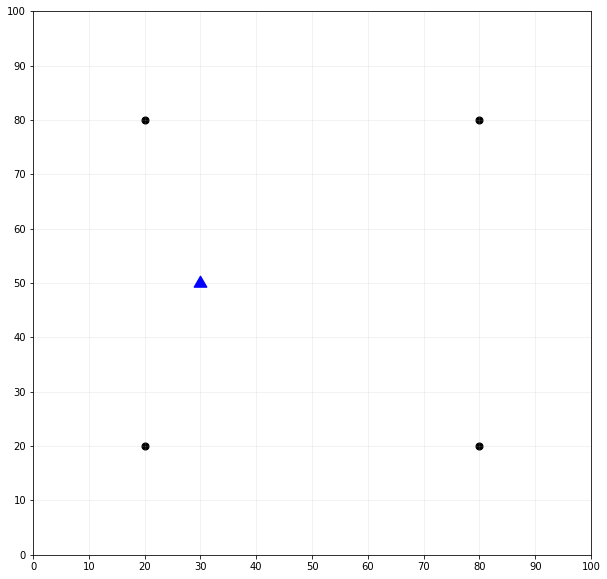

[x=40.0 y=50.0 orient=0.0]
[36.05551275463989, 50.0, 36.05551275463989, 50.0]


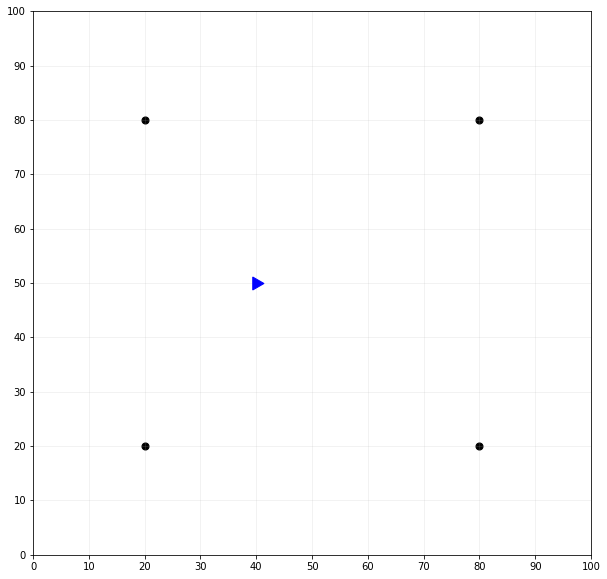

[x=40.0 y=40.0 orient=4.7123]
[28.284271247461902, 56.568542494923804, 44.721359549995796, 44.721359549995796]


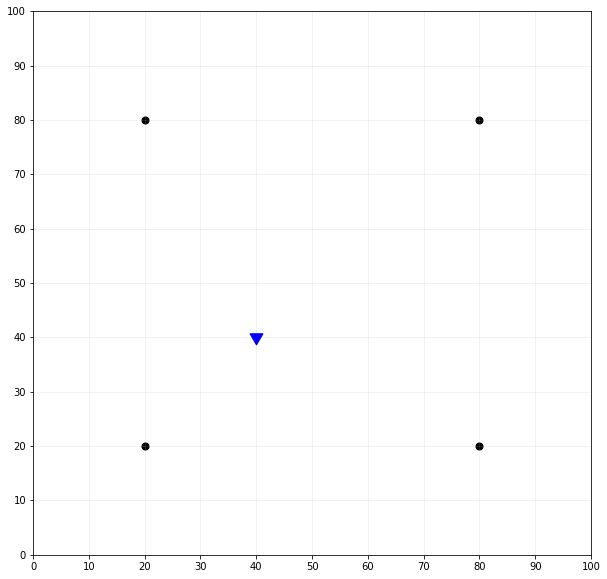

In [ ]:
# Ahora ustedes deben iniciar el robot en la posición (30,50) mirando hacia el
# norte (90º). Después rotar el robot en el sentido de las agujas del reloj 90º,
# moverlo 15m y realizar una medición. Luego volver a rotarlo en 90º en el
# sentido de las agujas del reloj, moverlo 10m y realizar otra medición.

## Su código acá
myrobot = Robot()
myrobot.set(30.0,50.0,pi/2)
print(myrobot)
myrobot.plot()

myrobot = myrobot.move(-pi/2,10.) 
print(myrobot)
print(myrobot.sense())
myrobot.plot()

myrobot = myrobot.move(-pi/2,10.) 
print(myrobot)
print(myrobot.sense())
myrobot.plot()

## Agregar ruido

La función set_noise(foward_noise,turn_noise,sense_noise) permite agregar ruido a cada acción que realiza el robot (dos asociadas al movimiento y una asocidada a la medición).

In [ ]:
# A partir de la función set noise agregar
foward_noise = 5.0
turn_noise = 0.1
sense_noise = 5.0
myrobot.set_noise(foward_noise,turn_noise,sense_noise)
print(myrobot.sense())
print(myrobot.sense())



[25.71526690437246, 59.15071727916535, 39.98691084124155, 40.87866441700334]
[22.303746640642238, 58.428842185362114, 48.390432333479175, 40.98167994612114]


# Partículas
Se van a crear J=1000 partículas, en el ambiente del robot. Estas partículas tienen 3 coordendas, posición.x, posición.y y orientación (ángulo en radianes medido desde el eje x).


Ver Jamboard.



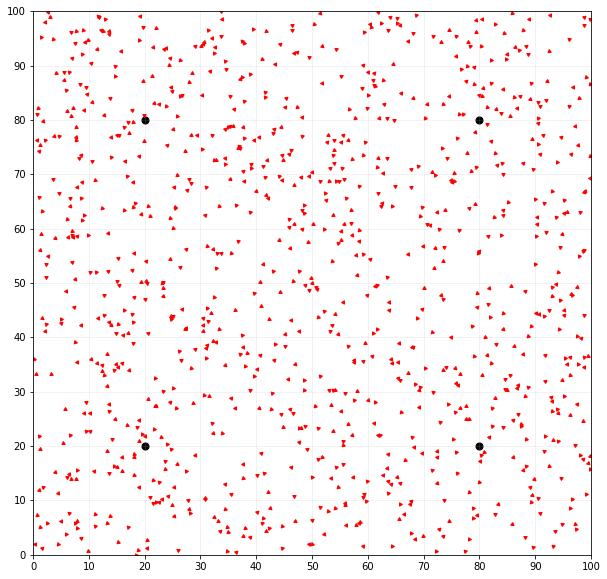

In [ ]:
# Queremos crear partículas, p[i]=Robot(). Ustedes deben escribir el código para
# asignar 1000 partículas a una lista. Las partículas deben ser aleatorias.
J = 1000
p = []

## Código
draw_table()
for i in range (J):
  particle = Robot()
  plt.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
  p.append(particle)
plt.show()

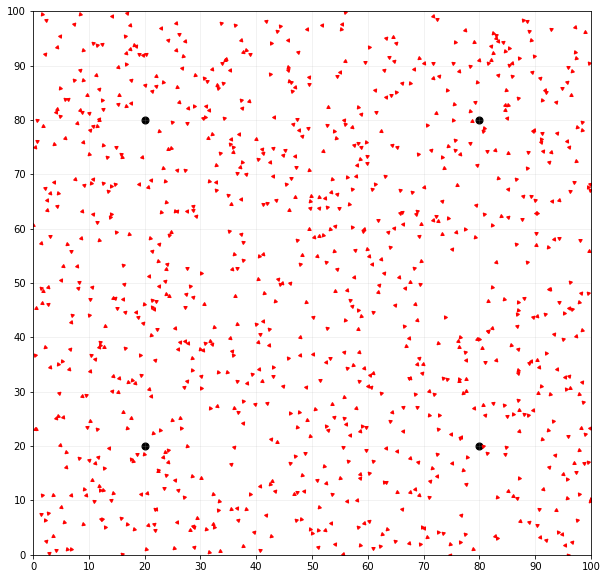

In [ ]:
# Ahora con las partículas generadas, simular movimiento del robot.
# Creando un nuevo set de partículas que gire 0.1rad y se mueva 5m.
p_new=[]

draw_table()
for particle in p:
  particle = particle.move(0.1,5.)
  plt.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
  p_new.append(particle)
plt.show()

# Pesos de Importancia

Explicación en Jamboard.

Programar: realizar un código que asigne pesos de importancia a cada partícula en la lista generada anteriormente. Observen que en la clase Robot() hay una función llamada *measurement_probability(Z)*. La entrada a esa función es el vector de mediciones y su salida es cuán probable es esa medición.

Este cálculo lo realiza midiento que tan lejos las mediciones predichas están de las mediciones actuales.





In [ ]:
# Para que la función measurement probability trabaje correctamente es necesario
# setearle ruido a las partículas, eso se puede hacerlo con 
#.set_noise(0.05,0.05,5.0)
def get_weights(list_particles, measurement):
  wt = []
  for particle in list_particles:
    particle.set_noise(0.05,0.05,5.0)
    wt.append(particle.measurement_prob(measurement))
  return wt

#Testeo los pesos cuando la medición es el sensado sobre la partícula 0
wt=get_weights(p_new,p_new[0].sense())
print(p_new[0:3])
print(wt[0:3])

[[x=92.613 y=48.913 orient=1.1890], [x=65.171 y=11.642 orient=1.6431], [x=24.810 y=79.668 orient=4.4062]]
[4.052847345693511e-05, 1.4980816747032713e-27, 2.3514011680074926e-81]


# Remuestreo

El remuestreo es la parte final del filtro de partículas. Acá es donde se genera una nueva lista de partículas dejando sobrevivir algunas partículas anteriores y matando las demás. Cuando se tienen J partículas para remuestrear, cada una de ellas tendrá 3 valores (x,y,orientación) y un peso, w. Los pesos son valores continuos que suman W:

$W=\sum_{i} w_i$

Se pueden normalizar esos pesos:

$\alpha_i = \frac{w_i}{W}$

La suma de todos los $\alpha$ debe dar 1.

$\sum_{i} \alpha_i = 1$

El remuestreo pone todas las particulas y sus pesos normalizados en una bolsa grande. Luego, toma J partículas con reemplazo sacando de a una, la probabilidad de escojer una partícula está asociada a $\alpha$.

Un ejemplo: Ver Jamboard.

**¿Cómo implementamos el remuestreo?**

## Resampling Wheel

Esta rueda reprenenta todas las particulas y su peso de importancia en una gran rueda. Cada partícula ocupa un pedazo que corresponde a su peso.

Ver Jamboard.

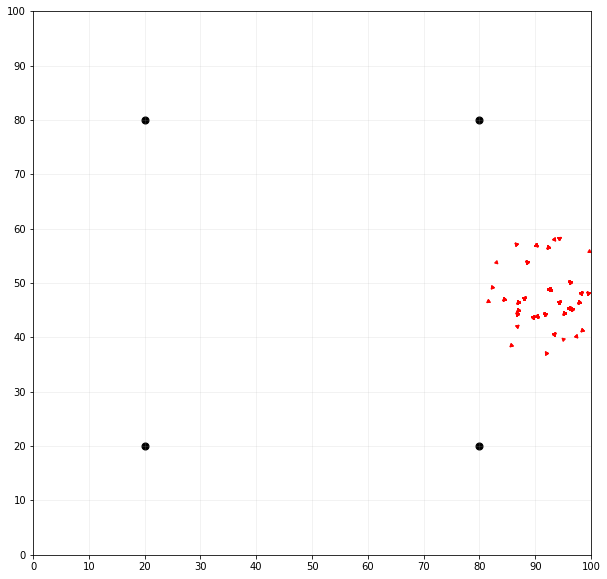

In [ ]:
# Programar la rueda de remuestreo.
def resampling_wheel(list_particles, weights):
  new_list_particles = []
  wheel = np.cumsum(weights) / np.sum(weights)
  for i in range(J):
    rand_value = random.random()
    index = np.argmax(wheel>rand_value)
    new_list_particles.append(list_particles[index])
  return new_list_particles

#Test
p_resampling = resampling_wheel(p_new,wt)
draw_table()
for particle in p_resampling:
  plt.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
plt.show()

In [ ]:
# Testear el comportamiento del filtro de partículas con la función eval(r,p)
def draw_filter(robot, particles):
  draw_table()
  for particle in particles:
    plt.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
  plt.plot(robot.x, robot.y, marker=(3, 0, (robot.orientation*180/pi)-90), markersize=15, linestyle='None', color='blue')
  plt.show()


def animate(movements):
  
  # Create the robot
  myrobot = Robot()
  myrobot.set(30.0,50.0,pi/2)
  foward_noise = 5.0
  turn_noise = 0.1
  sense_noise = 5.0
  myrobot.set_noise(foward_noise,turn_noise,sense_noise)

  #Create the particles
  J = 10000
  p = []
  for i in range (J):
    particle = Robot()
    particle.set_noise(0.05,0.05,5.0)
    p.append(particle)
  
  #Evaluate
  mean_error = evaluate(myrobot,p)
  
  #Save frame
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set(xlim=(0, world_size), xticks=range(0,110,10), \
         ylim=(0, world_size), yticks=range(0,110,10))
  ax.grid(True, alpha=0.2)
  for mark in landmarks:
      ax.scatter(mark[0],mark[1], c='black', s=50)

  camera = Camera(fig)
  
  for mark in landmarks:
      ax.scatter(mark[0],mark[1], c='black', s=50)
  for particle in p:
    ax.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
  ax.plot(myrobot.x, myrobot.y, marker=(3, 0, (myrobot.orientation*180/pi)-90), markersize=15, linestyle='None', color='blue')
  ax.text(10, 90,"Mean error: {:.2f}".format(mean_error), fontsize=14,bbox=dict(facecolor='orange', alpha=0.4))
  camera.snap()

  
  for movement in movements:
    # Movement
    myrobot=myrobot.move(movement['turn'],movement['forward'])
    for i in range(len(p)):
      p[i]=p[i].move(movement['turn'],movement['forward'])

    # Measurement
    measurement = myrobot.sense()

    # weight update
    wt = get_weights(p, measurement)

    # resampling
    p = resampling_wheel(p,wt)

    #Evaluation
    mean_error=evaluate(myrobot,p)
    
    #Save frame
    for mark in landmarks:
      ax.scatter(mark[0],mark[1], c='black', s=50)
    for particle in p:
      ax.plot(particle.x, particle.y, marker=(3, 0, (particle.orientation*180/pi)-90), markersize=4, linestyle='None', color='red')
    ax.plot(myrobot.x, myrobot.y, marker=(3, 0, (myrobot.orientation*180/pi)-90), markersize=15, linestyle='None', color='blue')
    ax.text(10, 90,"Mean error: {:.2f}".format(mean_error), fontsize=14,bbox=dict(facecolor='orange', alpha=0.4))
    camera.snap()

  plt.close('all')
  # Create animation
  anim = camera.animate(interval = 1000, repeat = True, repeat_delay = 2000)
    
  return anim

movements=[{'turn':0,'forward':10.0},
           {'turn':pi/2,'forward':10.0},
           {'turn':0,'forward':15.0},
           {'turn':0,'forward':20.0},
           {'turn':pi/2,'forward':10.0},
           {'turn':0,'forward':5},
           {'turn':pi/2,'forward':5},
           {'turn':0,'forward':0}]

# Inline display
HTML(animate(movements).to_html5_video())

# EXTRA para probar

In [ ]:
# Profe resampling wheel mejorado
def resampling_wheel(list_particles, weights):
    new_list_particles = []
    index = int(random.random() * J)
    beta = 0.0
    mw = max(weights)
    for i in range(J):
        beta += random.random() * 2.0 * mw
        while beta > weights[index]:
            beta -= weights[index]
            index = (index + 1) % J
        new_list_particles.append(list_particles[index])
    return new_list_particle

In [ ]:
"""
​
Particle Filter localization sample
​
author: Atsushi Sakai (@Atsushi_twi)
​
"""
​
import math
​
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as Rot
​
# Estimation parameter of PF
Q = np.diag([0.2]) ** 2  # range error
R = np.diag([2.0, np.deg2rad(40.0)]) ** 2  # input error
​
#  Simulation parameter
Q_sim = np.diag([0.2]) ** 2
R_sim = np.diag([1.0, np.deg2rad(30.0)]) ** 2
​
DT = 0.1  # time tick [s]
SIM_TIME = 50.0  # simulation time [s]
MAX_RANGE = 20.0  # maximum observation range
​
# Particle filter parameter
NP = 100  # Number of Particle
NTh = NP / 2.0  # Number of particle for re-sampling
​
show_animation = True
​
​
def calc_input():
    v = 1.0  # [m/s]
    yaw_rate = 0.1  # [rad/s]
    u = np.array([[v, yaw_rate]]).T
    return u
​
​
def observation(x_true, xd, u, rf_id):
    x_true = motion_model(x_true, u)
​
    # add noise to gps x-y
    z = np.zeros((0, 3))
​
    for i in range(len(rf_id[:, 0])):
​
        dx = x_true[0, 0] - rf_id[i, 0]
        dy = x_true[1, 0] - rf_id[i, 1]
        d = math.hypot(dx, dy)
        if d <= MAX_RANGE:
            dn = d + np.random.randn() * Q_sim[0, 0] ** 0.5  # add noise
            zi = np.array([[dn, rf_id[i, 0], rf_id[i, 1]]])
            z = np.vstack((z, zi))
​
    # add noise to input
    ud1 = u[0, 0] + np.random.randn() * R_sim[0, 0] ** 0.5
    ud2 = u[1, 0] + np.random.randn() * R_sim[1, 1] ** 0.5
    ud = np.array([[ud1, ud2]]).T
​
    xd = motion_model(xd, ud)
​
    return x_true, z, xd, ud
​
​
def motion_model(x, u):
    F = np.array([[1.0, 0, 0, 0],
                  [0, 1.0, 0, 0],
                  [0, 0, 1.0, 0],
                  [0, 0, 0, 0]])
​
    B = np.array([[DT * math.cos(x[2, 0]), 0],
                  [DT * math.sin(x[2, 0]), 0],
                  [0.0, DT],
                  [1.0, 0.0]])
​
    x = F.dot(x) + B.dot(u)
​
    return x
​
​
def gauss_likelihood(x, sigma):
    p = 1.0 / math.sqrt(2.0 * math.pi * sigma ** 2) * \
        math.exp(-x ** 2 / (2 * sigma ** 2))
​
    return p
​
​
def calc_covariance(x_est, px, pw):
    """
    calculate covariance matrix
    see ipynb doc
    """
    cov = np.zeros((3, 3))
    n_particle = px.shape[1]
    for i in range(n_particle):
        dx = (px[:, i:i + 1] - x_est)[0:3]
        cov += pw[0, i] * dx @ dx.T
    cov *= 1.0 / (1.0 - pw @ pw.T)
​
    return cov
​
​
def pf_localization(px, pw, z, u):
    """
    Localization with Particle filter
    """
​
    for ip in range(NP):
        x = np.array([px[:, ip]]).T
        w = pw[0, ip]
​
        #  Predict with random input sampling
        ud1 = u[0, 0] + np.random.randn() * R[0, 0] ** 0.5
        ud2 = u[1, 0] + np.random.randn() * R[1, 1] ** 0.5
        ud = np.array([[ud1, ud2]]).T
        x = motion_model(x, ud)
​
        #  Calc Importance Weight
        for i in range(len(z[:, 0])):
            dx = x[0, 0] - z[i, 1]
            dy = x[1, 0] - z[i, 2]
            pre_z = math.hypot(dx, dy)
            dz = pre_z - z[i, 0]
            w = w * gauss_likelihood(dz, math.sqrt(Q[0, 0]))
​
        px[:, ip] = x[:, 0]
        pw[0, ip] = w
​
    pw = pw / pw.sum()  # normalize
​
    x_est = px.dot(pw.T)
    p_est = calc_covariance(x_est, px, pw)
​
    N_eff = 1.0 / (pw.dot(pw.T))[0, 0]  # Effective particle number
    if N_eff < NTh:
        px, pw = re_sampling(px, pw)
    return x_est, p_est, px, pw
​
​
def re_sampling(px, pw):
    """
    low variance re-sampling
    """
​
    w_cum = np.cumsum(pw)
    base = np.arange(0.0, 1.0, 1 / NP)
    re_sample_id = base + np.random.uniform(0, 1 / NP)
    indexes = []
    ind = 0
    for ip in range(NP):
        while re_sample_id[ip] > w_cum[ind]:
            ind += 1
        indexes.append(ind)
​
    px = px[:, indexes]
    pw = np.zeros((1, NP)) + 1.0 / NP  # init weight
​
    return px, pw
​
​
def plot_covariance_ellipse(x_est, p_est):  # pragma: no cover
    p_xy = p_est[0:2, 0:2]
    eig_val, eig_vec = np.linalg.eig(p_xy)
​
    if eig_val[0] >= eig_val[1]:
        big_ind = 0
        small_ind = 1
    else:
        big_ind = 1
        small_ind = 0
​
    t = np.arange(0, 2 * math.pi + 0.1, 0.1)
​
    # eig_val[big_ind] or eiq_val[small_ind] were occasionally negative
    # numbers extremely close to 0 (~10^-20), catch these cases and set the
    # respective variable to 0
    try:
        a = math.sqrt(eig_val[big_ind])
    except ValueError:
        a = 0
​
    try:
        b = math.sqrt(eig_val[small_ind])
    except ValueError:
        b = 0
​
    x = [a * math.cos(it) for it in t]
    y = [b * math.sin(it) for it in t]
    angle = math.atan2(eig_vec[1, big_ind], eig_vec[0, big_ind])
    rot = Rot.from_euler('z', angle).as_matrix()[0:2, 0:2]
    fx = rot.dot(np.array([[x, y]]))
    px = np.array(fx[0, :] + x_est[0, 0]).flatten()
    py = np.array(fx[1, :] + x_est[1, 0]).flatten()
    plt.plot(px, py, "--r")
​
​
def main():
    print(__file__ + " start!!")
​
    time = 0.0
​
    # RF_ID positions [x, y]
    rf_id = np.array([[10.0, 0.0],
                      [10.0, 10.0],
                      [0.0, 15.0],
                      [-5.0, 20.0]])
​
    # State Vector [x y yaw v]'
    x_est = np.zeros((4, 1))
    x_true = np.zeros((4, 1))
​
    px = np.zeros((4, NP))  # Particle store
    pw = np.zeros((1, NP)) + 1.0 / NP  # Particle weight
    x_dr = np.zeros((4, 1))  # Dead reckoning
​
    # history
    h_x_est = x_est
    h_x_true = x_true
    h_x_dr = x_true
​
    while SIM_TIME >= time:
        time += DT
        u = calc_input()
​
        x_true, z, x_dr, ud = observation(x_true, x_dr, u, rf_id)
​
        x_est, PEst, px, pw = pf_localization(px, pw, z, ud)
​
        # store data history
        h_x_est = np.hstack((h_x_est, x_est))
        h_x_dr = np.hstack((h_x_dr, x_dr))
        h_x_true = np.hstack((h_x_true, x_true))
​
        if show_animation:
            plt.cla()
            # for stopping simulation with the esc key.
            plt.gcf().canvas.mpl_connect(
                'key_release_event',
                lambda event: [exit(0) if event.key == 'escape' else None])
​
            for i in range(len(z[:, 0])):
                plt.plot([x_true[0, 0], z[i, 1]], [x_true[1, 0], z[i, 2]], "-k")
            plt.plot(rf_id[:, 0], rf_id[:, 1], "*k")
            plt.plot(px[0, :], px[1, :], ".r")
            plt.plot(np.array(h_x_true[0, :]).flatten(),
                     np.array(h_x_true[1, :]).flatten(), "-b")
            plt.plot(np.array(h_x_dr[0, :]).flatten(),
                     np.array(h_x_dr[1, :]).flatten(), "-k")
            plt.plot(np.array(h_x_est[0, :]).flatten(),
                     np.array(h_x_est[1, :]).flatten(), "-r")
            plot_covariance_ellipse(x_est, PEst)
            plt.axis("equal")
            plt.grid(True)
            plt.pause(0.001)
​
​
if __name__ == '__main__':
    main()

In [ ]:
movements=[{'turn':0,'forward':0},
           {'turn':-pi/2,'forward':10.0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':20},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0},
           {'turn':0,'forward':0}]

foward_noise = 0.05
turn_noise = 0.05
sense_noise = 5.0
myrobot.set_noise(foward_noise,turn_noise,sense_noise)